In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seisbench.models as sbm
import torch
from torchviz import make_dot

from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [2]:
# phasenet model
pnmodel = sbm.PhaseNet.from_pretrained("original")

In [3]:
# Sample data

client = Client("GFZ")

t = UTCDateTime("2007/01/02 05:48:50")
stream = client.get_waveforms(
    network="CX",
    station="PB01",
    location="*",
    channel="HH?",
    starttime=t-5,
    endtime=t+71
).normalize()

In [4]:
X = np.stack([x.data for x in stream])
X_ = torch.tensor(X).unsqueeze(dim=0).float()
X_.shape

torch.Size([1, 3, 7601])

In [5]:
out = pnmodel(X_).squeeze()

In [6]:
# run multiple tensor sizes to see which ones work and which don't

success = []
fail = []
for _ in range(2000):
    length = np.random.randint(low=500, high=8000)
    A = torch.rand((1,3,length)).float()
    try:
        _ = pnmodel(A)
        success.append(length)
    except RuntimeError:
        fail.append(length)

In [7]:
len(fail), len(success)

(0, 2000)

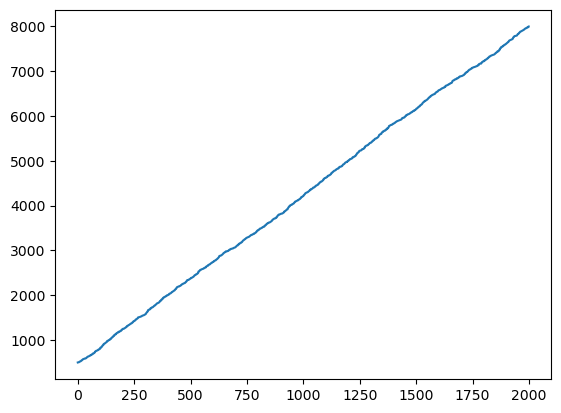

In [8]:
plt.plot(sorted(success))
plt.plot(sorted(fail))

In [9]:
sorted(fail)

[]

In [22]:
%timeit out = pnmodel(X_)

6.77 ms ± 260 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


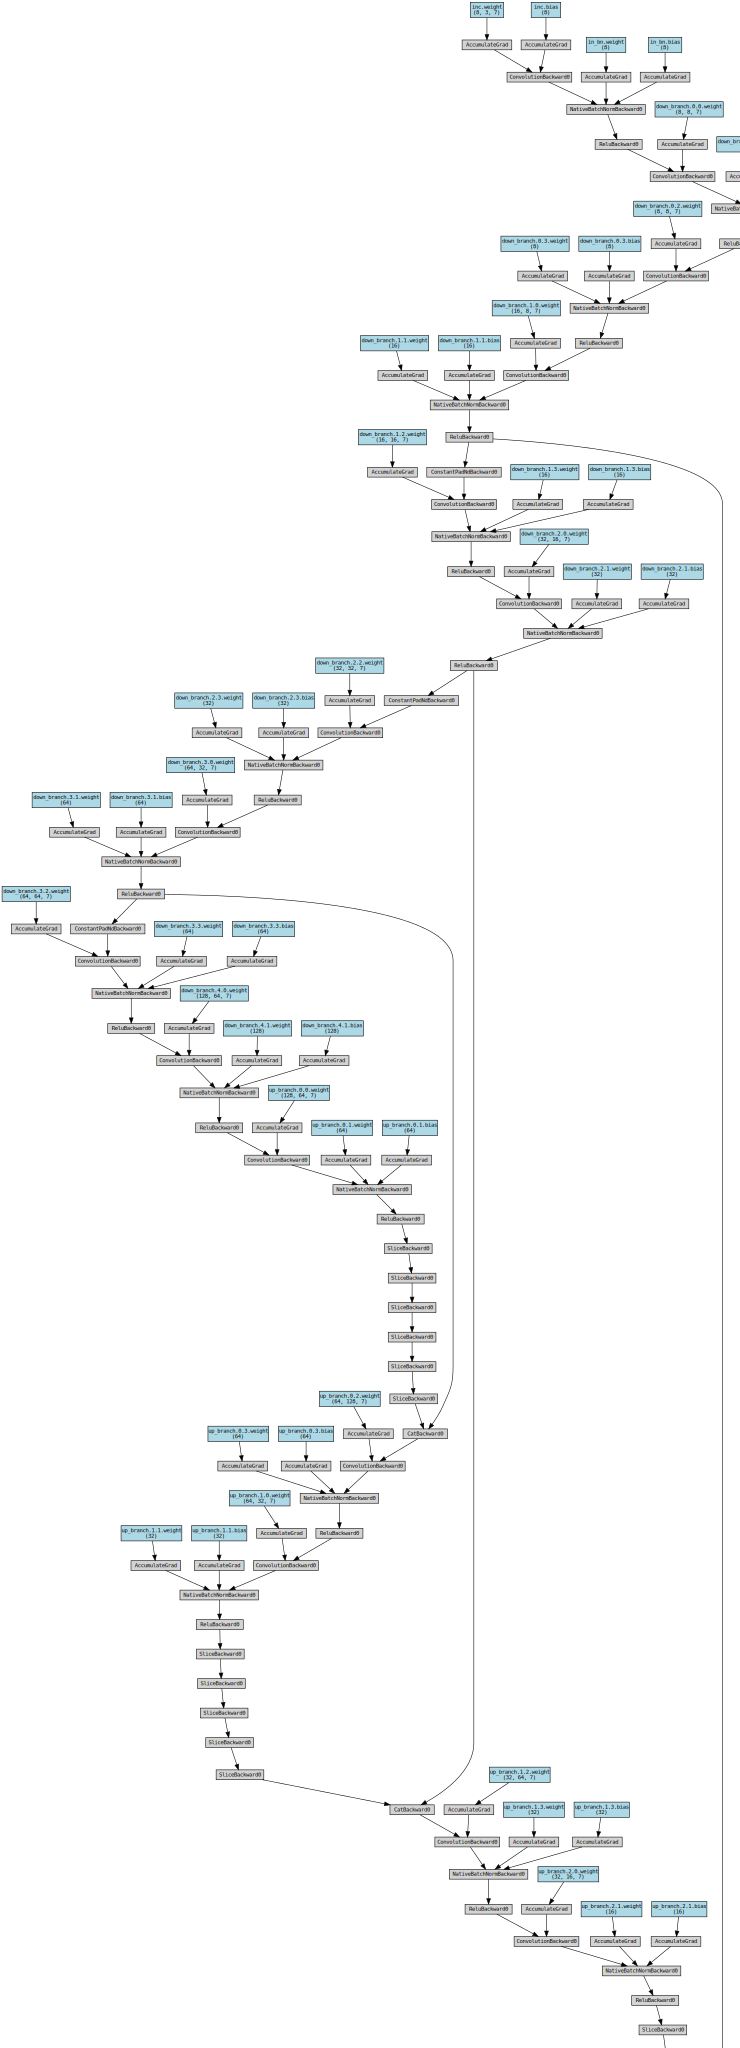

In [11]:
make_dot(out, params=dict(pnmodel.named_parameters()))

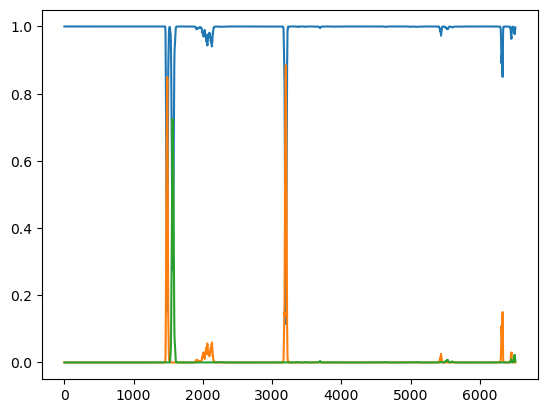

In [77]:
for a in out.detach().numpy():
    plt.plot(a)

In [12]:
make_dot?

Signature:
make_dot(
    var,
    params=None,
    show_attrs=False,
    show_saved=False,
    max_attr_chars=50,
)
Docstring:
Produces Graphviz representation of PyTorch autograd graph.

If a node represents a backward function, it is gray. Otherwise, the node
represents a tensor and is either blue, orange, or green:
 - Blue: reachable leaf tensors that requires grad (tensors whose `.grad`
     fields will be populated during `.backward()`)
 - Orange: saved tensors of custom autograd functions as well as those
     saved by built-in backward nodes
 - Green: tensor passed in as outputs
 - Dark green: if any output is a view, we represent its base tensor with
     a dark green node.

Args:
    var: output tensor
    params: dict of (name, tensor) to add names to node that requires grad
    show_attrs: whether to display non-tensor attributes of backward nodes
        (Requires PyTorch version >= 1.9)
    show_saved: whether to display saved tensor nodes that are not by custom
        au

In [13]:
pnl_stead_model = sbm.PhaseNetLight.from_pretrained("stead")

In [14]:
pnl_stead_model

PhaseNetLight(
  (inc): Conv1d(3, 8, kernel_size=(1,), stride=(1,))
  (in_bn): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv1dSame(
    (conv): Conv1d(8, 11, kernel_size=(7,), stride=(4,), padding=(3,))
  )
  (bnd1): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1dSame(
    (conv): Conv1d(11, 16, kernel_size=(7,), stride=(4,), padding=(3,))
  )
  (bnd2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv1dSame(
    (conv): Conv1d(16, 22, kernel_size=(7,), stride=(4,), padding=(3,))
  )
  (bnd3): BatchNorm1d(22, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv1dSame(
    (conv): Conv1d(22, 32, kernel_size=(7,), stride=(4,), padding=(3,))
  )
  (bnd4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (up1): ConvTranspose1d(32, 22, kernel_size=(7,), stride=(4,), padding=(2,))
  (bnu1):

In [18]:
oot = pnl_stead_model(X_).squeeze()

RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 87 but got size 86 for tensor number 1 in the list.